
# Analyse et Prévision des Données Météorologiques




## Importation des Données

In [2]:

import pandas as pd

# Chargement des données 
df = pd.read_csv('C:/Users/HP/Documents/ISE2_ENSAE_Dakar/Big data & Cloud computing/df_cedeao_10ans.csv')

# Affichage des premières lignes 
df.head()


,id_station,nom_ville,pays,etat,iso2,iso3,latitude,longitude,date,saison,temp_moyenne_c,temp_min_c,temp_max_c,precipitation_mm,vitesse_vent_moyenne_kmh,annee
0,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,2013-09-05,Autumn,25.1,23.000000,30.3,NaN,NaN,2013
1,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,2013-09-06,Autumn,24.7,22.600000,29.5,NaN,NaN,2013
2,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,2013-09-07,Autumn,25.6,22.500000,31.4,NaN,NaN,2013
3,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,2013-09-08,Autumn,24.8,22.500000,28.4,NaN,NaN,2013
4,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,2013-09-09,Autumn,24.8,23.390805,31.5,20.1,NaN,2013


# Analyse des Températures et Précipitations

Les précipitations et les températures sont des indicateurs essentiels pour comprendre les dynamiques climatiques et leurs impacts sur l'environnement . L'analyse de ces variables nous permettra de mieux anticiper les changements saisonniers, de détecter des tendances à long terme et d'identifier d'éventuelles anomalies climatiques. Dans ce cadre , l'étude des températures et des précipitations mensuelles et annuelles fournit des informations précieuses sur les variations climatiques au fil des années et aide à modéliser des prévisions météorologiques.

# Analyse de la température moyenne par pays

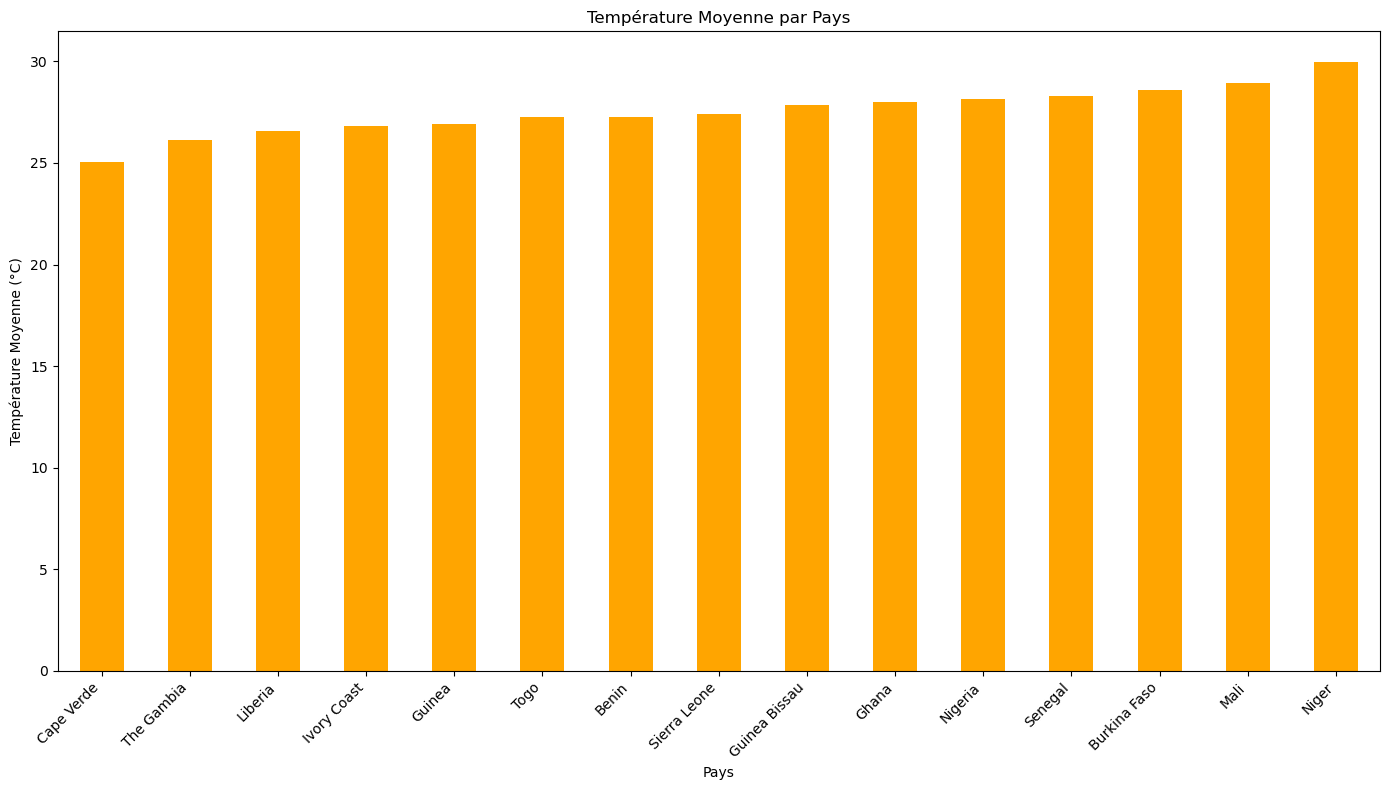

In [3]:
# Analyse de la température moyenne par pays

import matplotlib.pyplot as plt

# Calcul de la température moyenne par pays
temp_moyenne_pays = df.groupby('pays')['temp_moyenne_c'].mean()

# graphique des températures moyennes par pays
plt.figure(figsize=(14, 8))
temp_moyenne_pays.sort_values().plot(kind='bar', color='orange')
plt.title("Température Moyenne par Pays")
plt.xlabel("Pays")
plt.ylabel("Température Moyenne (°C)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

Le graphique présenté ci-dessus montre les variations de la température moyenne dans les pays de la zone CEDEAO sur une période de dix ans. Les données indiquent que les températures fluctuent généralement entre 25 °C et 30 °C au cours de cette période. En examinant les résultats de manière plus détaillée, il apparaît que le Cap-Vert se distingue en enregistrant les températures les plus basses de la région ,contrairement, au Niger qui se positionne à l'autre extrémité du spectre, avec des températures plus élevées. Ces différences de température soulignent  les variations climatiques au sein de la zone CEDEAO.

# Analyse de la température annuelle par période

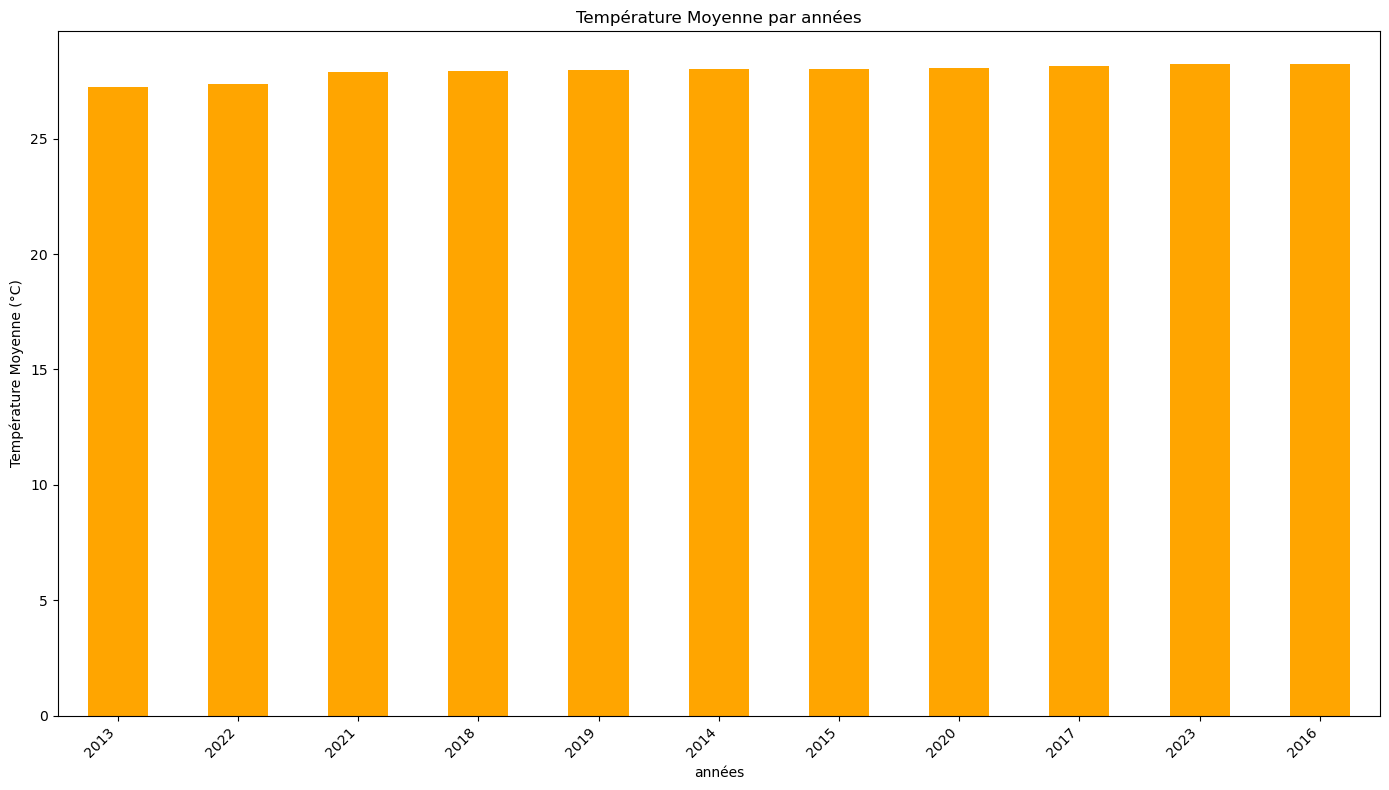

In [4]:
# Calcul de la température moyenne par pays
temp_moyenne_pays = df.groupby('annee')['temp_moyenne_c'].mean()

# un graphique des températures moyennes par pays
plt.figure(figsize=(14, 8))
temp_moyenne_pays.sort_values().plot(kind='bar', color='orange')
plt.title("Température Moyenne par années")
plt.xlabel("années")
plt.ylabel("Température Moyenne (°C)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

D'une année à l'autre, les températures au sein de la CEDEAO montrent une variation relativement faible. En dépit des différences individuelles entre les pays, comme les températures plus basses enregistrées au Cap-Vert et les valeurs plus élevées au Niger, les fluctuations annuelles restent limitées. Cela suggère que, bien que des tendances saisonnières et des événements climatiques puissent survenir, l'ensemble de la région maintient une homogénéité dans ses conditions thermiques. 

# Analyse de la moyenne des précipitations par pays

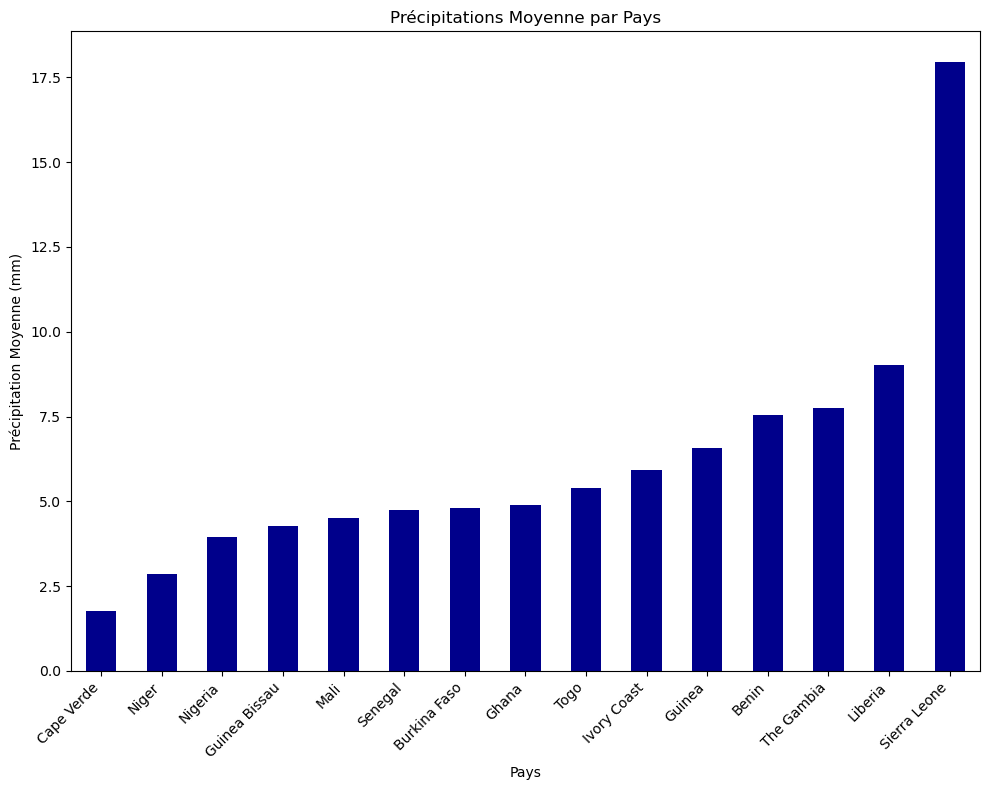

In [5]:
# Calcul de la précipitation moyenne par pays
pre_moyenne_pays = df.groupby('pays')['precipitation_mm'].mean()

#  graphique des températures moyennes par pays
plt.figure(figsize=(10, 8))
pre_moyenne_pays.sort_values().plot(kind='bar', color='darkblue')
plt.title("Précipitations Moyenne par Pays")
plt.xlabel("Pays")
plt.ylabel("Précipitation Moyenne (mm)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

Le graphique montrant le niveau moyen des précipitations dans la zone de la CEDEAO met en évidence la Sierra Leone comme detenteur des records des précipitations dans la Zone. Contrairement au Cap vert et au Niger qui enregistre les précipitations les plus basses.

# Analyse des précipitations moyennes par années

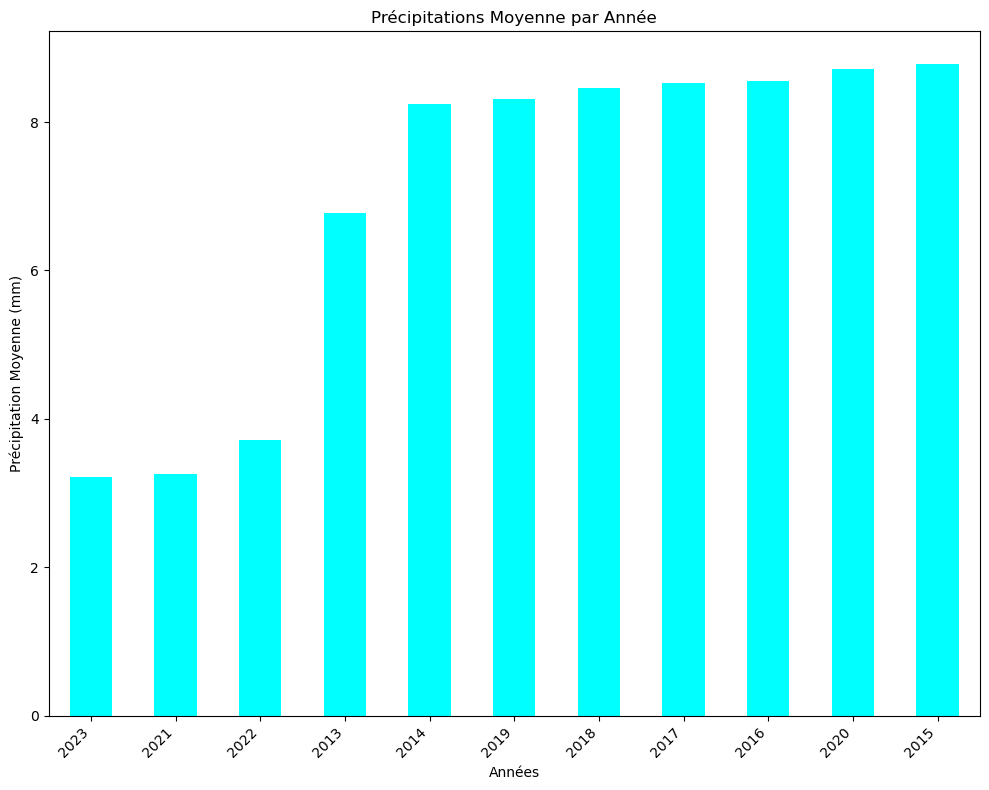

In [6]:
# Calcul de la précipitation moyenne par année
pre_moyenne_pays = df.groupby('annee')['precipitation_mm'].mean()

#  graphique des températures moyennes par pays
plt.figure(figsize=(10, 8))
pre_moyenne_pays.sort_values().plot(kind='bar', color='cyan')
plt.title("Précipitations Moyenne par Année")
plt.xlabel("Années")
plt.ylabel("Précipitation Moyenne (mm)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Affichage
plt.show()

De manière générale , les précipitations dans l'union variaient entre 7 mm et 10 mm dans la péride de 2013 à 2015. Cependant, à partir de 2021, on constate une baisse des précipitations qui décroit jusque dans l'intervalle de 3mm à4 mm.

# Précipitation annuelle par pays

In [7]:

moyennes_annuelles = df.groupby(['pays', 'annee'])['precipitation_mm'].mean().reset_index()# moyenne des précipitations par année et par pays
moyenne_2013 = moyennes_annuelles[moyennes_annuelles['annee'] == 2013] # filtre pour 2013
moyenne_2023 = moyennes_annuelles[moyennes_annuelles['annee'] == 2023]# filtre pour 2023
# renommer les colonnes des nouveaux dataframes
moyenne_2013.rename(columns={'precipitation_mm': 'precipitation_2013'}, inplace=True)
moyenne_2023.rename(columns={'precipitation_mm': 'precipitation_2023'}, inplace=True)
# Fusion
variation_df = pd.merge(moyenne_2013, moyenne_2023, on='pays')

# Calcul de la variation en pourcentage
variation_df['variation_%'] = ((variation_df['precipitation_2023'] - variation_df['precipitation_2013']) / variation_df['precipitation_2013']) * 100

# Affichage
print(variation_df[['pays', 'precipitation_2013', 'precipitation_2023', 'variation_%']])

             pays  precipitation_2013  precipitation_2023  variation_%
0           Benin            5.531944            6.613006    19.542158
1    Burkina Faso            5.732065            2.527865   -55.899584
2      Cape Verde            9.485714            0.455417   -95.198921
3           Ghana            6.110714            3.606528   -40.980258
4          Guinea           12.378750            4.760000   -61.547006
5   Guinea Bissau                 NaN            3.353347          NaN
6     Ivory Coast            5.908705            3.424583   -42.041731
7         Liberia            8.100000            8.524583     5.241770
8            Mali            5.903604            1.614882   -72.645830
9           Niger            3.231111            1.147214   -64.494737
10        Nigeria            3.978571            2.980987   -25.073932
11        Senegal            7.701181            1.842344   -76.077127
12   Sierra Leone           11.414583           11.407500    -0.062055
13    

C:\Users\HP\AppData\Local\Temp\ipykernel_13856\3707317077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moyenne_2013.rename(columns={'precipitation_mm': 'precipitation_2013'}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13856\3707317077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moyenne_2023.rename(columns={'precipitation_mm': 'precipitation_2023'}, inplace=True)


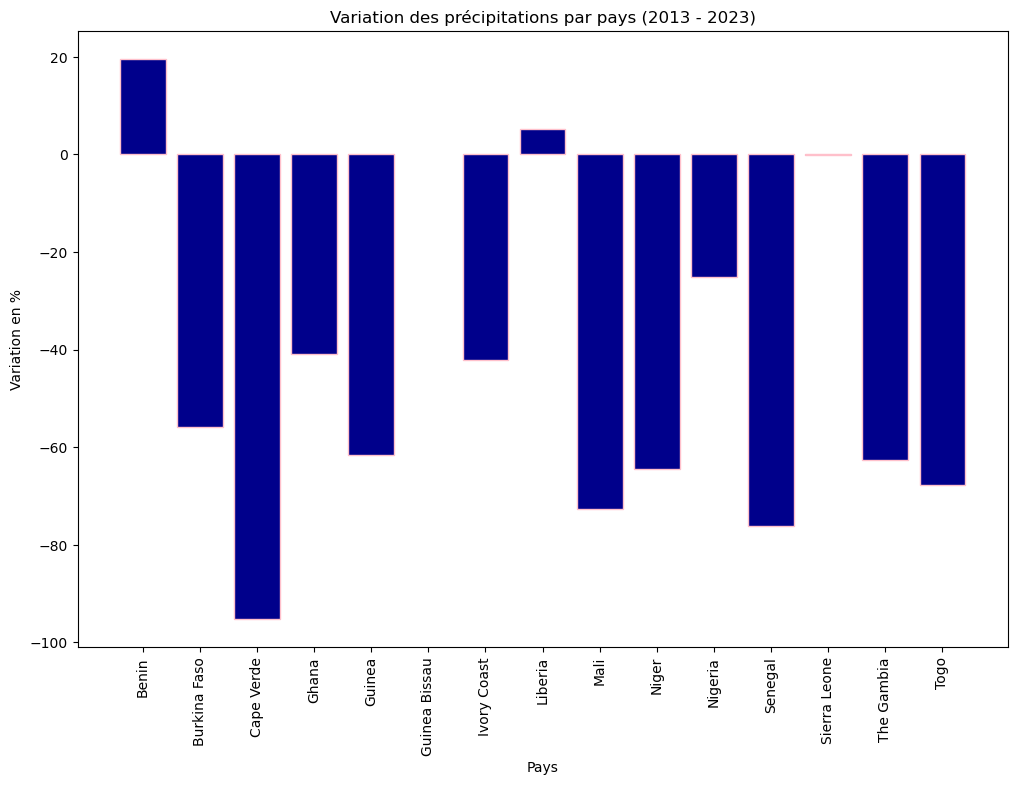

In [8]:
#  l'histogramme des variations par pays
plt.figure(figsize=(12, 8))
plt.bar(variation_df['pays'], variation_df['variation_%'], color='darkblue', edgecolor='pink')
plt.xticks(rotation=90)  # pivot des noms des pays pour une meilleure lisibilité
plt.title("Variation des précipitations par pays (2013 - 2023)")
plt.xlabel("Pays")
plt.ylabel("Variation en %")
plt.show()

Le graphique des variations des précipitations de 2013 à 2023 dans les pays de la CEDEAO met en lumière une tendance générale de diminution des précipitations dans la Zone. Seuls le Bénin et le Liberia montrent une variation positive, ce qui signifie que ces deux pays ont connu une légère augmentation des précipitations au cours de cette période. En revanche, tous les autres pays de la CEDEAO affichent des variations négatives, indiquant une réduction des précipitations. Cette diminution est particulièrement marquée pour le Cap-Vert, qui enregistre une chute notable avoisinant les -95%.

Nous allons nous interresser donc maintenant à la variation par année pour chaque pays

# Analyse de la variation annuelle de la précipitation dans la CEDEAO

In [9]:
# Calcul de la variation d'une année à l'autre
moyennes_an = df.groupby([ 'annee'])['precipitation_mm'].mean().reset_index()
moyennes_an['variation'] = moyennes_an['precipitation_mm'].diff()

# Calcul de la variation en pourcentage
moyennes_an['variation_%'] = (moyennes_an['variation'] / moyennes_an['precipitation_mm'].shift(1)) * 100

# Affichage
print(moyennes_an)

    annee  precipitation_mm  variation  variation_%
0    2013          6.770321        NaN          NaN
1    2014          8.247526   1.477206    21.818848
2    2015          8.782665   0.535139     6.488478
3    2016          8.552569  -0.230097    -2.619898
4    2017          8.530646  -0.021922    -0.256323
5    2018          8.452049  -0.078598    -0.921355
6    2019          8.313537  -0.138512    -1.638795
7    2020          8.714040   0.400503     4.817474
8    2021          3.251994  -5.462045   -62.680977
9    2022          3.714014   0.462020    14.207274
10   2023          3.212619  -0.501396   -13.500100


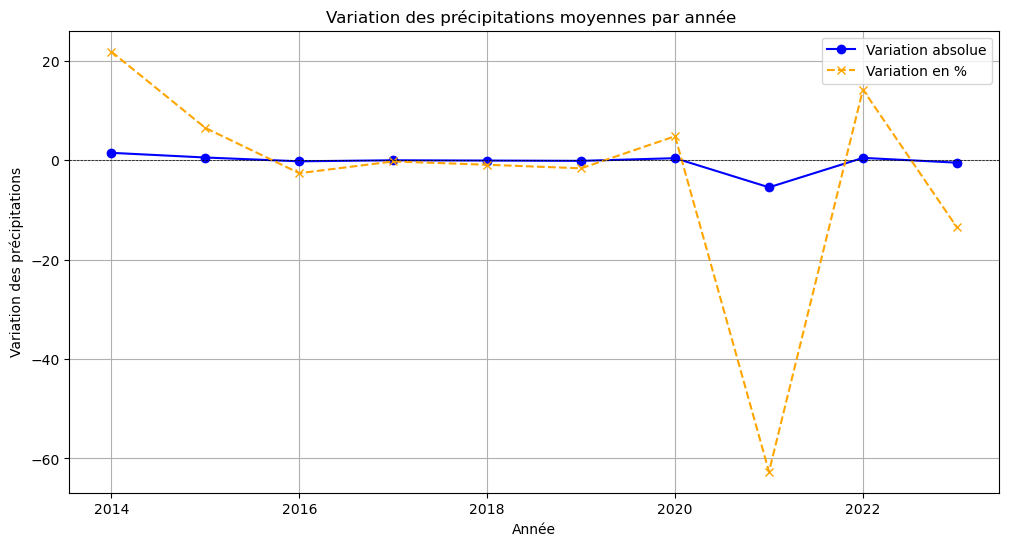

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(moyennes_an['annee'], moyennes_an['variation'], marker='o', linestyle='-', color='blue', label='Variation absolue')
plt.plot(moyennes_an['annee'], moyennes_an['variation_%'], marker='x', linestyle='--', color='orange', label='Variation en %')

#  labels et un titre
plt.title("Variation des précipitations moyennes par année ")
plt.xlabel("Année")
plt.ylabel("Variation des précipitations")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ligne horizontale  y=0 pour référence
plt.legend()
plt.grid()

# Affichage
plt.show()

# Analyse de la température moyenne annuelle dans la CEDEAO

In [11]:
moyennes_an_t = df.groupby([ 'annee'])['temp_moyenne_c'].mean().reset_index() # dataframe de la moyenne de la température par années
moyennes_an_t['variation_t'] = moyennes_an_t['temp_moyenne_c'].diff() # calcul de la variation absolu

# les résultats
print(moyennes_an_t)

    annee  temp_moyenne_c  variation_t
0    2013       27.238354          NaN
1    2014       27.993484     0.755130
2    2015       28.024792     0.031307
3    2016       28.234970     0.210178
4    2017       28.165924    -0.069046
5    2018       27.927207    -0.238717
6    2019       27.986717     0.059509
7    2020       28.076116     0.089399
8    2021       27.866027    -0.210088
9    2022       27.364266    -0.501761
10   2023       28.220045     0.855779


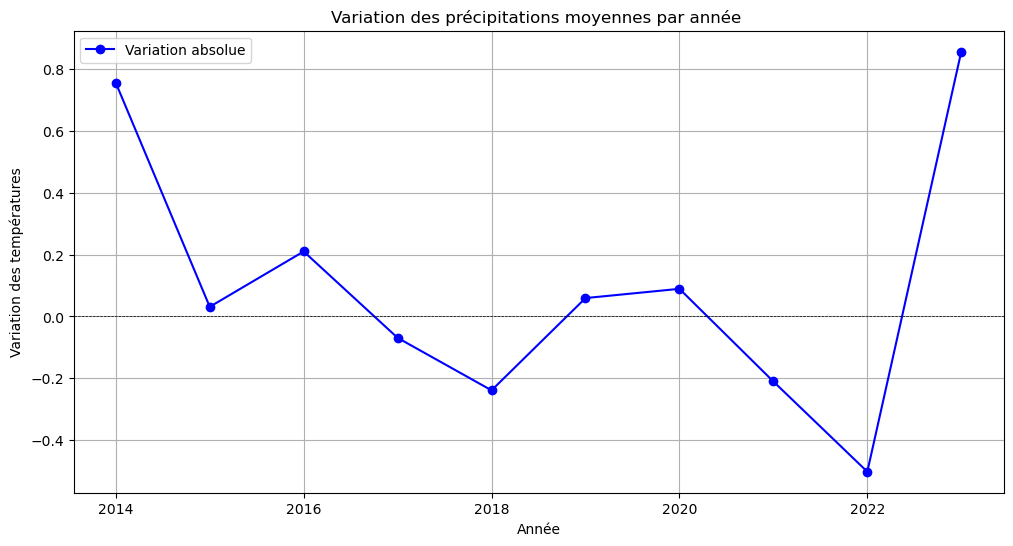

In [12]:
# courbe de la de la variation de la précipitation
plt.figure(figsize=(12, 6))
plt.plot(moyennes_an_t['annee'], moyennes_an_t['variation_t'], marker='o', linestyle='-', color='blue', label='Variation absolue')

#  labels et un titre
plt.title("Variation des températures moyennes par année ")
plt.xlabel("Année")
plt.ylabel("Variation des températures")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ligne horizontale à y=0 pour référence
plt.legend()
plt.grid()

# Affichage
plt.show()

# Relation entre variation des précipitations et variations et variations des températures

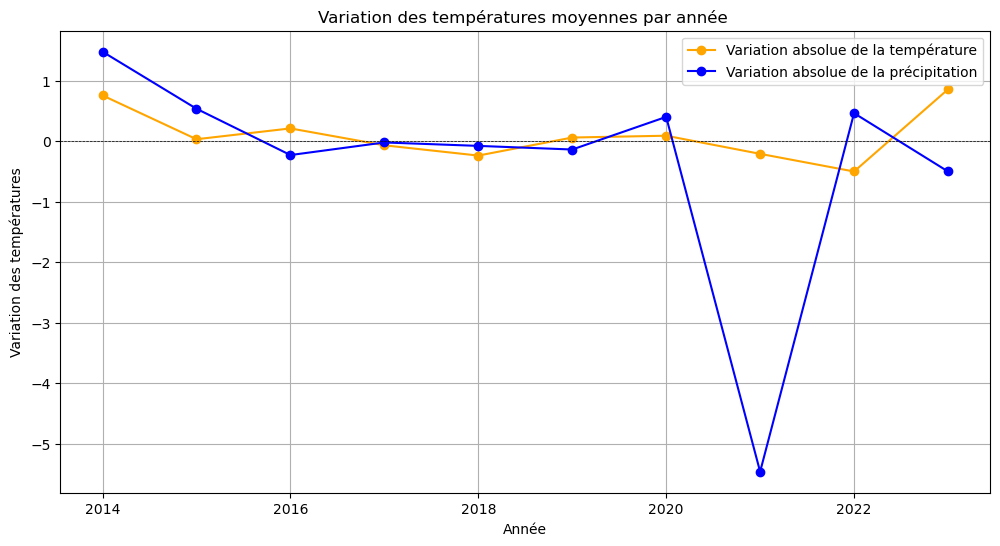

In [17]:
# courbes de variation des températures e des pécipitations
plt.figure(figsize=(12, 6))
plt.plot(moyennes_an_t['annee'], moyennes_an_t['variation_t'], marker='o', linestyle='-', color='orange', label='Variation absolue de la température')
plt.plot(moyennes_an['annee'], moyennes_an['variation'], marker='o', linestyle='-', color='blue', label='Variation absolue de la précipitation')

#  labels et un titre
plt.title("Variation des températures moyennes par année ")
plt.xlabel("Année")
plt.ylabel("Variation des températures")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ligne horizontale à y=0 pour référence
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()

# Corrélation entre température et précipitations

In [18]:
# Calcul de la corrélation entre la température et les précipitations
correlation_matrix = df[['temp_moyenne_c', 'precipitation_mm']].corr()
correlation_pandas = correlation_matrix.loc['temp_moyenne_c', 'precipitation_mm']
print(f"Corrélation (avec pandas) : {correlation_pandas}")


Corrélation (avec pandas) : -0.18657954321151266


Le coefficient de corrélation de -0,1866 indique une faible corrélation négative entre les températures et les précipitations dans cet ensemble de données. Cela signifie qu'en moyenne, une légère tendance inverse est observée : lorsque la température augmente, les précipitations tendent à diminuer, et inversement. Toutefois, cette relation est peu marquée en raison de la proximité du coefficient à zéro. Cela suggère qu'il n'existe pas de relation linéaire forte entre les deux variables, indiquant que les précipitations peuvent être influencées par d'autres facteurs indépendants de la température ou que la relation entre température et précipitations pourrait être non linéaire ou contextuelle, par exemple saisonnière.Ce coefficient montre une tendance inverse faible entre les deux variables, mais cette relation reste trop faible pour être considérée comme significative dans des prédictions fiables.

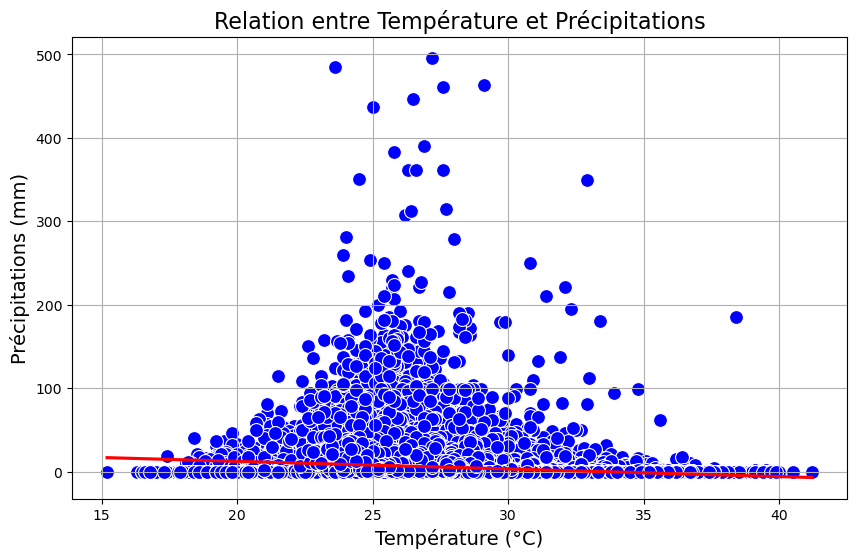

In [24]:
 import seaborn as sns

    # diagramme de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_moyenne_c', y='precipitation_mm', data=df, color='blue', s=100)

#  ligne de régression
sns.regplot(x='temp_moyenne_c', y='precipitation_mm', data=df, scatter=False, color='red')

# Personnalisation du graphique
plt.title("Relation entre Température et Précipitations", fontsize=16)
plt.xlabel("Température (°C)", fontsize=14)
plt.ylabel("Précipitations (mm)", fontsize=14)
plt.grid(True)

# Affichage du graphique
plt.show()



# Prévision de la variation des précipitations par pays

In [21]:
# calcul de la corrélation entre année et variation de la précipitation annuelle
correlation_matrix = moyennes_an[['annee', 'variation']].corr()
correlation_pandas = correlation_matrix.loc['annee', 'variation']
print(f"Corrélation  : {correlation_pandas}")


Corrélation  : -0.42280247920289066


D'après les analyses faites plus haut, la variation de la température est une fonction linéaire du temps . Le calcul du coefficient de corrélation montre une corrélation négative ce qui voudrait dire que plus on avance en anné plus la quantité de pluie dans la zone diminue.

C:\Users\HP\AppData\Local\Temp\ipykernel_13856\1648609675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country.dropna(subset=['variation'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13856\1648609675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country.dropna(subset=['variation'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13856\1648609675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

             pays  prediction
0           Benin   -0.849568
1    Burkina Faso   -1.499424
2      Cape Verde   -0.152028
3           Ghana   -1.939480
4          Guinea   -4.872052
5   Guinea Bissau   -5.484673
6     Ivory Coast   -1.849041
7         Liberia   -1.531482
8            Mali   -1.441272
9           Niger   -1.984653
10        Nigeria   -2.669250
11        Senegal   -3.260003
12   Sierra Leone   -5.233235
13     The Gambia   -3.258492
14           Togo   -2.015505


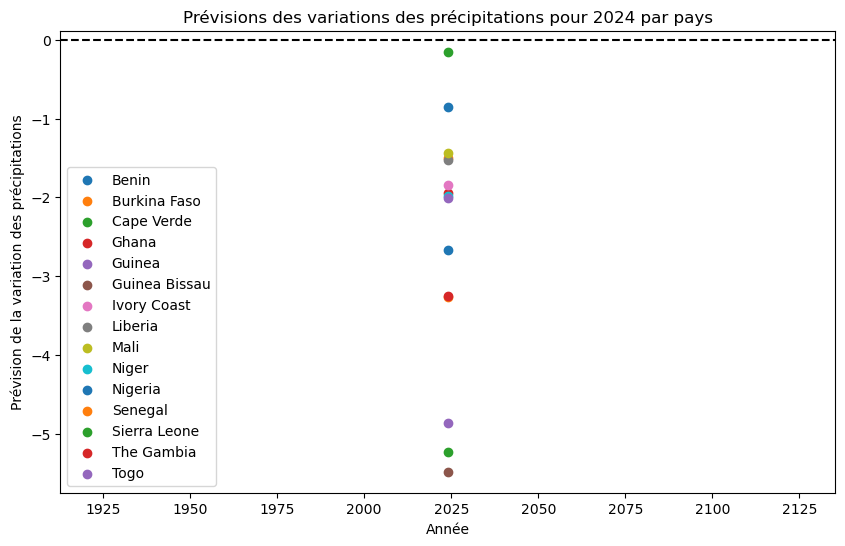

In [24]:
import statsmodels.api as sm
moyennes_annuelles['variation'] = moyennes_annuelles['precipitation_mm'].diff() # calcul de la variation absolu pour le dt moyennes_annuelles

# Préparation des prévisions pour chaque pays
resultats_previsions = []

# Boucle à travers chaque pays unique
for pays in moyennes_annuelles['pays'].unique():
    # Filtr des données pour le pays actuel
    data_country = moyennes_annuelles[moyennes_annuelles['pays'] == pays]
    
    # Suppression les lignes avec des variations manquantes (Si tu peux revoir ceci)
    data_country.dropna(subset=['variation'], inplace=True)
    
    X = data_country['annee']  # Variable indépendante (année)
    y = data_country['variation']  # Variable dépendante (variation)

    # Ajouter une constante pour le terme d'interception
    X = sm.add_constant(X)

    # Ajuster le modèle de régression linéaire
    model = sm.OLS(y, X).fit()

    # Prévision pour l'année 2024
    année_2024 = pd.DataFrame({'const': 1, 'annee': [2024]})  # Préparer les données pour 2024
    prediction = model.predict(année_2024)

    # stockage du  résultat
    resultats_previsions.append({'pays': pays, 'prediction': prediction[0]})

# Converssion les résultats en DataFrame
df_resultats = pd.DataFrame(resultats_previsions)

# Affichage les prévisions pour chaque pays
print(df_resultats)

# Visualisation des résultats pour chaque pays
plt.figure(figsize=(10, 6))
for pays in df_resultats['pays']:
    plt.scatter(2024, df_resultats[df_resultats['pays'] == pays]['prediction'], label=pays)

plt.axhline(0, color='black', linestyle='--')
plt.title("Prévisions des variations des précipitations pour 2024 par pays")
plt.xlabel("Année")
plt.ylabel("Prévision de la variation des précipitations")
plt.legend()
plt.show()